In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#encoding = "latin-1"
df = pd.read_csv('/content/energydata-complete.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


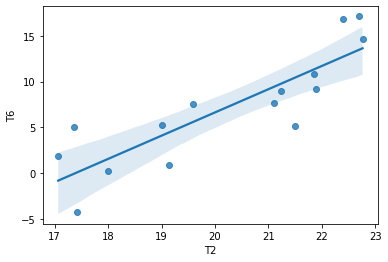

In [12]:
#select a sample of the dataset
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=2)

#regression plot
sns.regplot(x="T2", y="T6",
data=simple_linear_reg_df)


In [13]:
#putting models in a dictionary
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [14]:
#splitting the data into x and y
x = df['T2']
y = df['T6']

In [15]:
#splitting data into train and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=40)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15788,), (15788,), (3947,), (3947,))

In [18]:
models = {"XGBoost Regressor" : XGBRegressor(),
          "DecisionTree Regressor": DecisionTreeRegressor(),
          "Random Forest" : RandomForestRegressor(),
          "gradientboosting": GradientBoostingRegressor(),
          "KNeighborsRegressor": KNeighborsRegressor(),
          "Ridge": Ridge(),
          "SVR": SVR(),
          "LinearRegression": LinearRegression()}

In [22]:
def fit_and_score(models, X_train, x_test, y_train, y_test):
  
  np.random.seed(42)

  #making a dictionary to keep model scores
  model_scores = {}

  for name, model in models.items():
    model.fit(x_train, y_train)

    model_scores[name] = model.score(x_test, y_test)

  return model_scores

In [24]:
linear_model = LinearRegression()
#fit the model to the traning dataset 
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

ValueError: ignored

In [23]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

NameError: ignored

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
 weights = pd.Series(model.coef_, feat.columns).sort_values()
 weights_df = pd.DataFrame(weights).reset_index()
 weights_df.colimns = ['Features', 'col_name']
 weights_df[col_name].round(3)
 return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Rigde_weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)